**Study on regression models.**

*   Linear Regression
*   Polynomial regression
*   Ridge Regression





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/boston.csv')

In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

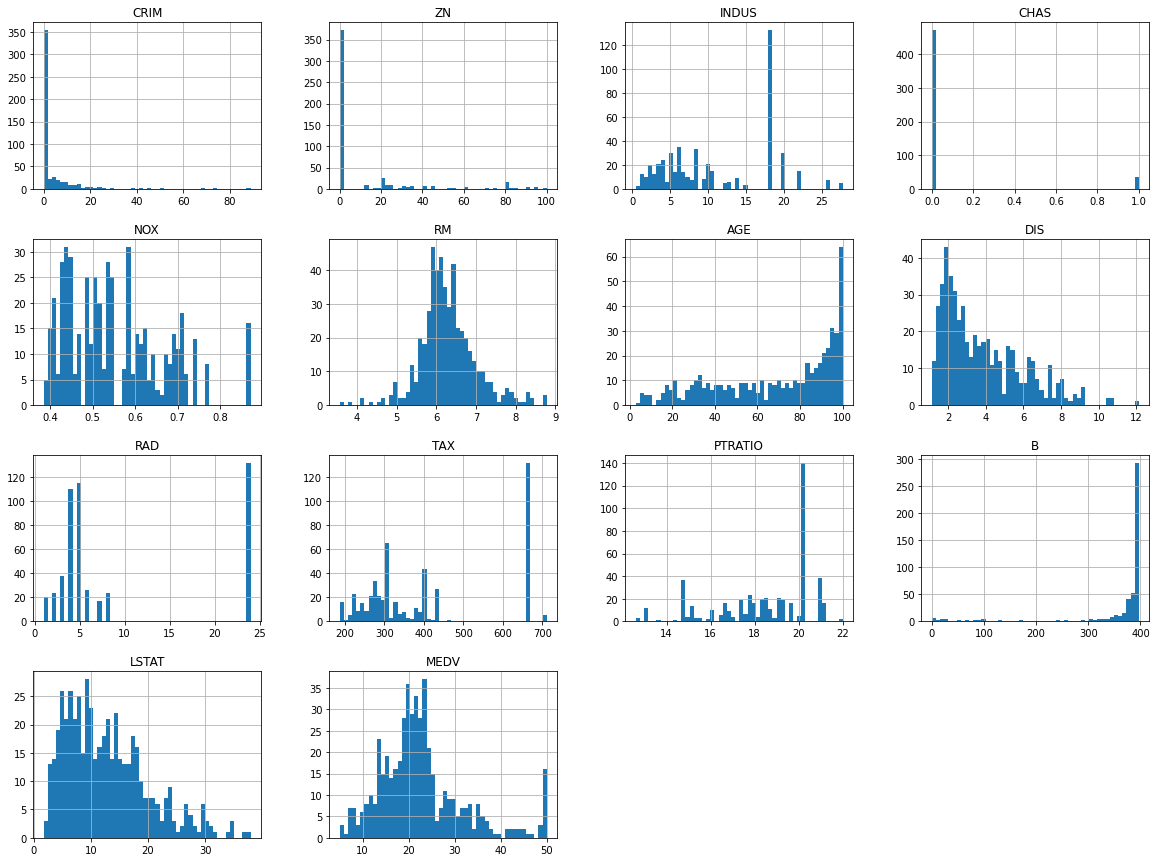

In [4]:
df.hist(bins=50, figsize=(20,15));

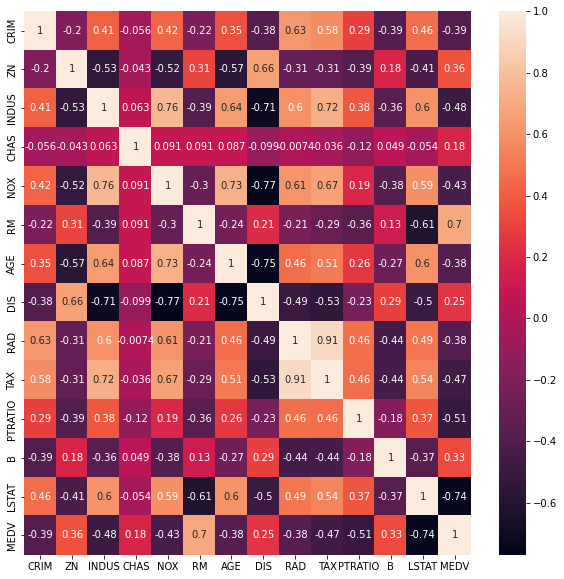

In [5]:
# Heatmap
corr_matrix = df.corr()
plt.figure(figsize = (10,10))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

**Splitting data**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['MEDV']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Select and Train a Model**

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression(normalize=True)

In [11]:
reg = lm.fit(X_train, y_train);

In [12]:
reg.score(X_test, y_test)

0.668759493535632

In [13]:
reg.score(X_train, y_train)

0.7508856358979673

In [14]:
reg.intercept_, reg.coef_

(30.246750993923833,
 array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
        -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
         2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]))

**Adding Polynomial Features**

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly_fea = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train  = poly_fea.fit_transform(X_train)
X_poly_test  = poly_fea.fit_transform(X_test)
lm.fit(X_poly_train,y_train)    

LinearRegression(normalize=True)

In [17]:
lm.score(X_poly_test, y_test)

0.8055829447972166

In [18]:
lm.score(X_poly_train, y_train)

0.9409317027113498

In [19]:
lm.intercept_, lm.coef_

(-218.09134651218534,
 array([-7.25310964e+00,  6.57815778e-01, -4.72143546e+00,  3.67701296e+01,
         2.85823326e+02,  1.78767173e+01,  6.57468467e-01, -4.06243198e+00,
         2.63488938e+00,  2.27920237e-03,  7.65416924e+00,  1.38958628e-01,
        -1.93992518e-01,  4.04813149e-04,  7.87960035e-02,  5.60682886e-01,
         2.57743200e+00, -2.03232180e+00,  1.88609931e-01, -2.15597466e-03,
        -7.43944840e-02,  3.12831484e-01, -3.56502470e-02,  6.52569452e-01,
        -4.20860936e-04,  3.31178087e-02, -4.39361143e-04, -4.90784493e-03,
        -4.13517309e-02, -1.36813350e+00, -3.52443123e-03,  1.23844324e-03,
        -2.11046690e-02, -1.69498485e-02,  8.50347013e-04, -3.14878051e-03,
         8.13229863e-05, -9.93465028e-03,  5.39529179e-02, -2.65028584e-02,
        -2.15071910e-01,  3.36014173e-01,  4.38281406e-03,  1.53047843e-01,
        -3.31490443e-02,  2.08816688e-04, -1.64325688e-02,  3.15367725e-03,
        -1.84563819e-02,  3.67701296e+01, -3.66684669e+01, -5.2666

**Ridge Regression**

In [20]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [22]:
ridge_reg = Ridge(alpha=0.05)

In [23]:
ridge_reg.fit(X_train_scaled, y_train)

Ridge(alpha=0.05)

In [24]:
ridge_reg.score(X_train_scaled, y_train)

0.7508705525877521

In [25]:
ridge_reg.score(X_test_scaled, y_test)

0.5720192578372867

**Ploting Learning Curves**

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
def plot_learning_curve(model, x, y):
  x_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

(0.0, 50.0)

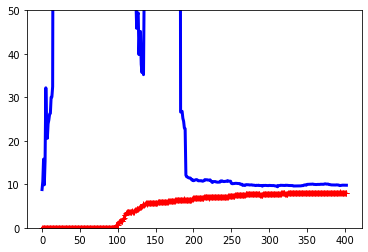

In [28]:
#Polynomial Regression

from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)), ("lin_reg", LinearRegression()),])

plot_learning_curve(polynomial_regression, X, y)
plt.ylim(0,50)

(0.0, 50.0)

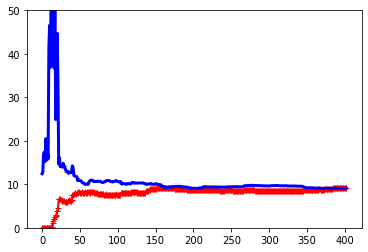

In [29]:
#Linear Regression
plot_learning_curve(lm, X, y);
plt.ylim(0,50)

(0.0, 50.0)

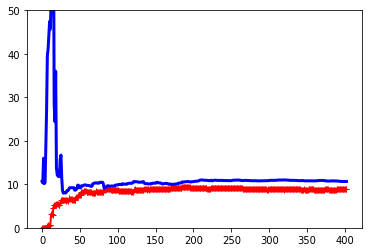

In [30]:
#Ridge Regression
plot_learning_curve(ridge_reg, X, y)
plt.ylim(0,50)